In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.913931147503192
Training loss: 0.8426667847740117
Training loss: 0.5284918669952767
Training loss: 0.4328258056630458
Training loss: 0.38691198018822337


In [8]:
images[1].shape

torch.Size([1, 28, 28])

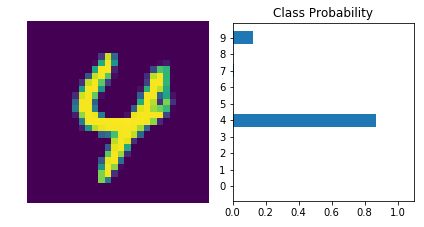

In [6]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

In [18]:
IMG_DIR = 'C:/Users/Billi/repos/sudoku/images/Square4'

In [26]:
gray_images = []
for images in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR, images), cv2.BGR_2)
   # img_flatten = img_array.reshape(-1)
    gray_images.append(img_array)

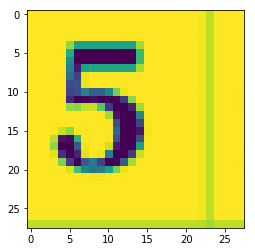

In [27]:
plt.imshow(gray_images[1])

In [24]:
gray_images[1].shape

(28, 28)

In [25]:

img = gray_images[1].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

ValueError: Type must be a sub-type of ndarray type

# CNN Model

self.conv1 = nn.Conv2d(1, 6, 3, 1)
- We pass in the channel for grayscale images i.e. 1
- 6 is the number of features extracted
- 3 is the kernel for the filter, so a filter of 3x3
- 1 is the step size i.e. how far does the filter go before recalculating


The second layer will take our 6 input channels and deliver 16 output channels.
    self.conv2 = nn.Conv2d(6, 16, 3, 1)

In [ ]:
# rank 4 tensor to be passed into the model
x = X_train.view(1,1,28,28)
print(x.shape)